## Zadanie 1

Zakładam istnienie 2 klas: $\{A, B\}$ \
Rozdział tych klas w aktualnym obszarze przebiega ze stosunkami: \
$A: x$ \
$B: 1 - x$ \
$x \in [0, 1]$

W związku z tym współczynnik Giniego: $I = 1 - \left( x^2 + (1 - x)^2 \right) = -2x^2 + 2x$

Wsp. Giniego osiąga minima ($I = 0$) dla $x = 0$ lub $x = 1$ (wtedy w aktualnym obszarze występuje tylko jedna klasa) \
Wsp. Giniego osiąga maksimum ($I = 0.5$) dla $x = 0.5$ (tutaj obszar zawiera klasy w stosunku $0.5$) \
\
Można to rozumowanie uogólnić na $n$ klas i wtedy:
- $I = 0$ jeśli w aktualnym obszarze występuje tylko jedna z tych klas - to oznacza dobry rozdział/klasyfikację
- $I = max = 1 - n \left( \frac{1}{n} \right)^2$ jeśli w danym obszarze stosunki występowania klas są równe - tutaj nie ma żadnego rozdziału, klasy wciąż są wymieszane

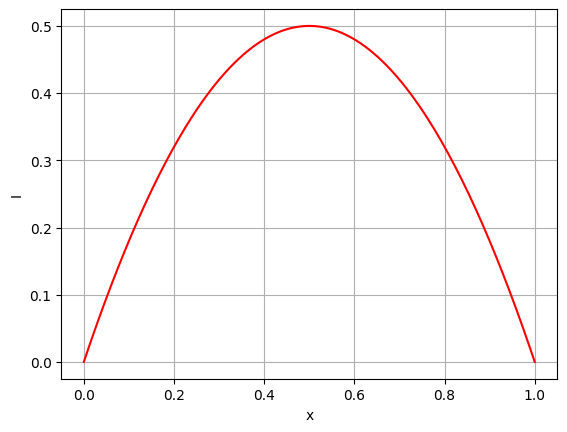

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.0, 1.0, 200)
fx = -2 * x ** 2 + 2 * x

plt.plot(x, fx, color="red")
plt.xlabel("x")
plt.ylabel("I")
plt.grid()
plt.show()

## Zadanie 2

In [2]:
from math import log2

total_samples = 105

ratio_1 = 34 / total_samples
ratio_2 = 32 / total_samples
ratio_3 = 39 / total_samples

entropy = 0.0
entropy += ratio_1 * log2(ratio_1)
entropy += ratio_2 * log2(ratio_2)
entropy += ratio_3 * log2(ratio_3)

print(-entropy)

1.5799176782552726


## Zadanie 3

In [11]:
total_samples = 105

ratio_1 = 34 / total_samples
ratio_2 = 32 / total_samples
ratio_3 = 39 / total_samples

gini = 1.0
gini -= ratio_1 ** 2
gini -= ratio_2 ** 2
gini -= ratio_3 ** 2

print(gini)

0.6643083900226757


## Zadanie 4

## Wstęp: o drzewach decyzyjnych...

Drzewo decyzyjne jest, jak sama nazwa wskazuje, strukturą o budowie drzewiastej. Reprezentuje podziały zbioru obserwacji na podklasy
według określonych parametrów. Za każdym takim podziałem stoi prosta decyzja: **jeśli (warunek) to: klasa_n wpp: klasa_m**. Koncept ten nie jest nowy, miał swoje początki w latach 70 a podobnych konstrukcji używał Linneusz już w latach 30 XVIII w. \
Drzewa decyzyjne są bardzo skuteczną metodą ale nie są pozbawione wad - są dość wrażliwe na specyfikę danych. Już niewielkie zmiany w zbiorze uczącym mogą doprowadzić do rozwinięcia zupełnie innego drzewa.

## Jak udoskonalić drzewa decyzyjne?
### Agregacja bootstrapowa (bagging):

- metoda pojawiła się w 1996 (Breiman),
- do predykcji wykorzystywane jest wiele drzew decyzyjnych,
- dane do uczenia poszczególnych drzew decyzyjnych są losowane ze zwracaniem z oryginalnego zbioru danych,
- zbiorem walidacyjnym jest część zbioru danych nie wybrana do procesu uczenia,
- wynik predykcji określany jest na podstawie głosowania - zwracana jest ta odpowiedź którą dało najwięcej drzew składowych
- wada: takie modele są ciężkie pod względem obliczeniowym i pamięciowym,
- wada: podobna struktura poszczególnych klasyfikatorów nie pozwala na uogólnianie wyników na dane spoza zbioru uczącego

### Lasy losowe:

- metoda powstała w 2001 (Breiman),
- algorytm bardzo podobny do agregacji bootstrapowej (losowanie danych, tworzenie zbiorów walidacyjnych),
- do poszczególnych drzew wykorzystywana jest tylko część dostępnych predykatorów,
- dla każdego podzbioru losowane są zmienne objaśniające,
- wynik predykcji wybierany jest na zasadzie głosowania,
- algorytm jest stabilny,
- wada: ciężar obliczeń

### ADABOOST:

- polega na łączeniu mniejszych klasyfikatorów w zespoły (metaklasyfikatory) - tymi klasyfikatorami mogą być drzewa decyzyjne,
- zespół ma dużą siłę predykcji, pomimo tego, że poszczególne klasyfikatory wchodzące w jego skład są raczej słabe,
- w tym algorytmie przepływ danych jest sekwencyjny a nie równoległy jak w lasach losowych,
- każdy kolejny zespół stara się poprawnie sklasyfikować to co zostało źle sklasyfikowane przez poprzednie zespoły,
- wada: taki model łatwo jest przetrenować

### XGBOOST:

- zaproponowany w 2016 przez Tiangi Chen,
- na ostateczną predykcję mają wpływ wszystkie drzewa decyzyje wchodzące w skład modelu,
- tutaj również wykorzystywana jest strategia przyrostowa,
- stosuje się tu regularyzację w postaci kary za ilość liści w drzewie decyzyjnym,
- algorytm składa się z dwóch części: pierwsza odpowiada za minimalizację błędu, druga (regularyzacja) zapobiega przetrenowaniu

## Zadanie 5

In [106]:
to_mean = []

n = 10000

# Zbiór początkowy 200 elementowy
samples = list(range(200))

for _ in range(n):
    choices = []

    # Losuję zbiór 200 elementowy ze zbioru pierwotnego
    for _ in range(200):
        choices.append(random.choice(samples))
    
    # Sprawdzam procent pokrycia pomiędzy zbiorem wylosowanym a pierwotnym
    to_mean.append(len(set(choices)) / len(samples))
    
# Liczę średni procent pokrycia
print(f"{round(sum(to_mean) * 100 / len(to_mean), 2)}%")

63.33%


## Zadanie 6

In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import random
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


def flatten(buffer):
    result = []
    
    for element in buffer:
        result += element
        
    return result


def has_digit(token):
    digits = "0123456789"
    
    for character in token:
        if character in digits:
            return True
    
    return False


stopwords = set(stopwords.words('english'))

with open("real.txt", "r") as input_file:
    real = input_file.read().split("\n")

with open("fake.txt", "r") as input_file:
    fake = input_file.read().split("\n")


# Tokenizacja nagłówków, stopwords i tokeny zawierające cyfry są odrzucane
real_tokenized = []

for sentence in real:
    real_tokenized.append([word for word in word_tokenize(sentence) if word not in stopwords and not has_digit(word)])
    
fake_tokenized = []

for sentence in fake:
    fake_tokenized.append([word for word in word_tokenize(sentence) if word not in stopwords and not has_digit(word)])


all_words_real = flatten(real_tokenized)
all_words_fake = flatten(fake_tokenized)
all_words = all_words_real + all_words_fake

### Najczęściej pojawiające się słowa w prawdziwych nagłówkach:

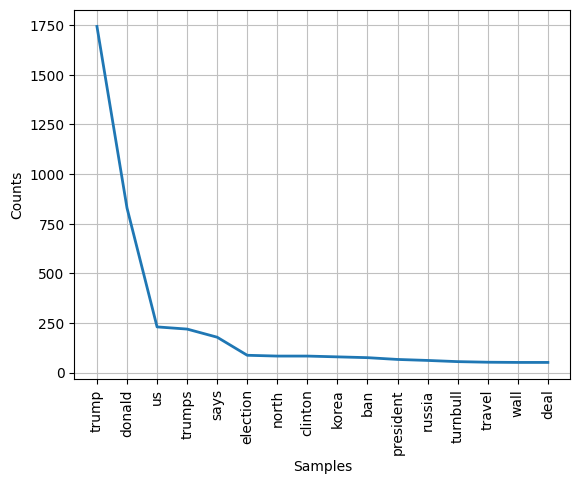

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [2]:
real_dist = FreqDist(all_words_real)
real_dist.plot(16)

### Najczęściej pojawiające się słowa w fałszywych nagłówkach:

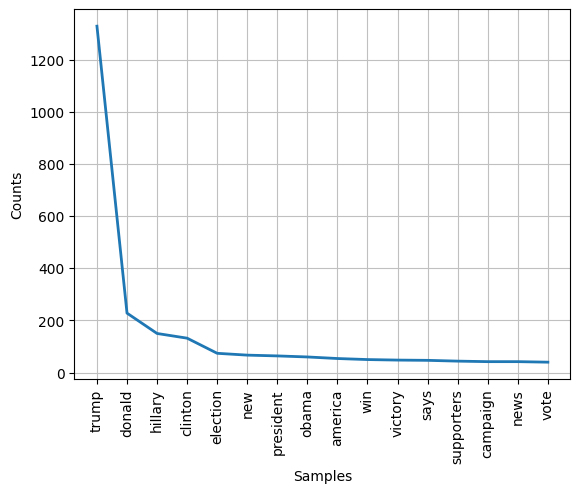

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [3]:
fake_dist = FreqDist(all_words_fake)
fake_dist.plot(16)

### Częstotliwość występowania wszystkich słów (z obu typów nagłówków):

In [4]:
all_words_dist = FreqDist(all_words)

max_lines = 32      # Ograniczenie na ilość linii

for index, (word, freq) in enumerate(all_words_dist.items()):
    if index == max_lines:
        break
        
    print(f"{word} : {freq}")

donald : 1057
trump : 3072
remember : 4
year : 16
since : 11
elected : 21
defends : 23
son : 7
emails : 15
moscow : 5
hits : 13
back : 34
strategist : 6
says : 225
media : 54
wont : 20
easily : 1
give : 5
america : 74
anthony : 9
scaramucci : 10
trumps : 223
new : 106
comms : 2
director : 17
mobile : 1
phone : 13
use : 6
worries : 1
security : 22
experts : 8
us : 269


In [5]:
print(f"Unikatowe słowa: {len(set(all_words))}")

all_words_dist = FreqDist(all_words)

# Wybieram 700 najczęściej powtarzających się słów jako słowa reprezentatywne
repr_words = [word[0] for word in all_words_dist.most_common(700)]

Unikatowe słowa: 5616


In [6]:
def representation(sentence):
    sent_repr = []
    
    for word in repr_words:
        if word in sentence:
            sent_repr.append(1)
        else:
            sent_repr.append(0)
            
    return np.array(sent_repr)

In [7]:
real_representation = [(representation(sentence), 1) for sentence in real_tokenized]
fake_representation = [(representation(sentence), 0) for sentence in fake_tokenized]

In [8]:
samples = real_representation + fake_representation
random.shuffle(samples)

samples_train = samples[:int(len(samples) * 0.7)]
samples_test = samples[int(len(samples) * 0.7):int(len(samples) * 0.85)]
samples_validation = samples[int(len(samples) * 0.85):]

train_x = [sample[0] for sample in samples_train]
train_y = [sample[1] for sample in samples_train]

test_x = [sample[0] for sample in samples_test]
test_y = [sample[1] for sample in samples_test]

validation_x = [sample[0] for sample in samples_validation]
validation_y = [sample[1] for sample in samples_validation]

### Model: lasy losowe - przegląd hiperparametrów:

In [15]:
model = RandomForestClassifier(n_estimators=10, max_depth=10)
model.fit(validation_x, validation_y)

pred_y = model.predict(test_x)
print(metrics.classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.32      0.75      0.45        81
           1       0.93      0.68      0.79       409

    accuracy                           0.70       490
   macro avg       0.63      0.72      0.62       490
weighted avg       0.83      0.70      0.73       490



In [16]:
model = RandomForestClassifier(n_estimators=10, max_depth=50)
model.fit(validation_x, validation_y)

pred_y = model.predict(test_x)
print(metrics.classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.55      0.70      0.62       148
           1       0.85      0.75      0.80       342

    accuracy                           0.73       490
   macro avg       0.70      0.73      0.71       490
weighted avg       0.76      0.73      0.74       490



In [17]:
model = RandomForestClassifier(n_estimators=10, max_depth=100)
model.fit(validation_x, validation_y)

pred_y = model.predict(test_x)
print(metrics.classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65       162
           1       0.84      0.77      0.80       328

    accuracy                           0.75       490
   macro avg       0.72      0.74      0.73       490
weighted avg       0.76      0.75      0.75       490



In [21]:
model = RandomForestClassifier(n_estimators=20, max_depth=100)
model.fit(validation_x, validation_y)

pred_y = model.predict(test_x)
print(metrics.classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.58      0.68      0.63       161
           1       0.83      0.76      0.79       329

    accuracy                           0.73       490
   macro avg       0.70      0.72      0.71       490
weighted avg       0.75      0.73      0.74       490



In [22]:
model = RandomForestClassifier(n_estimators=30, max_depth=100)
model.fit(validation_x, validation_y)

pred_y = model.predict(test_x)
print(metrics.classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       139
           1       0.87      0.74      0.80       351

    accuracy                           0.74       490
   macro avg       0.70      0.73      0.70       490
weighted avg       0.77      0.74      0.75       490



In [33]:
# max_depth=None -> tutaj dobranie głębokości jest automatyczne, węzły są rozwijane aż wszystkie liście będą
# czyste, lub zostanie osiągnieta granica podziału
model = RandomForestClassifier(n_estimators=50, max_depth=None)
model.fit(validation_x, validation_y)

pred_y = model.predict(test_x)
print(metrics.classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64       161
           1       0.84      0.76      0.80       329

    accuracy                           0.74       490
   macro avg       0.71      0.73      0.72       490
weighted avg       0.76      0.74      0.75       490



### Trenowanie modelu (lasy losowe) o wybranych hiperparametrach:

In [35]:
model = RandomForestClassifier(n_estimators=50, max_depth=None)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)
print(metrics.classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       188
           1       0.85      0.85      0.85       302

    accuracy                           0.82       490
   macro avg       0.81      0.81      0.81       490
weighted avg       0.82      0.82      0.82       490



### Podsumowanie:

Po dobraniu odpowiednich wartości hiperparametrów udało sie osiągnąć dokładność klasyfikacji na poziomie 80%.
Można też zauważyć, że precyzja klasyfikacji nagłówków fałszywych jest niższa od precyzji klasyfikacji nagłówków prawdziwych.

### Model: regresja logistyczna - przegląd hiperparametrów:

In [67]:
# tol=1e-8 -> to max liczba iteracji warunkuje kiedy prerwać trenowanie
model_linear = LogisticRegression(solver="liblinear", penalty="l1", max_iter=100, tol=1e-8)
model_linear.fit(validation_x, validation_y)

pred_y = model_linear.predict(test_x)
print(metrics.classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.56      0.70      0.62       153
           1       0.85      0.75      0.80       337

    accuracy                           0.74       490
   macro avg       0.70      0.73      0.71       490
weighted avg       0.76      0.74      0.74       490



In [68]:
# tol=1e-8 -> to max liczba iteracji warunkuje kiedy prerwać trenowanie
model_linear = LogisticRegression(solver="liblinear", penalty="l2", max_iter=100, tol=1e-8)
model_linear.fit(validation_x, validation_y)

pred_y = model_linear.predict(test_x)
print(metrics.classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68       181
           1       0.82      0.80      0.81       309

    accuracy                           0.76       490
   macro avg       0.74      0.75      0.75       490
weighted avg       0.76      0.76      0.76       490



In [82]:
# tol=1e-8 -> to max liczba iteracji warunkuje kiedy prerwać trenowanie
model_linear = LogisticRegression(solver="newton-cg", penalty="none", max_iter=2000, tol=1e-8)
model_linear.fit(validation_x, validation_y)

pred_y = model_linear.predict(test_x)
print(metrics.classification_report(pred_y, test_y))

# Tutaj pomimo dużej liczby iteracji nie udało się uzyskać zbieżności

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       198
           1       0.74      0.76      0.75       292

    accuracy                           0.70       490
   macro avg       0.69      0.68      0.68       490
weighted avg       0.70      0.70      0.70       490



C:\Python\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [79]:
# tol=1e-8 -> to max liczba iteracji warunkuje kiedy prerwać trenowanie
model_linear = LogisticRegression(solver="newton-cg", penalty="l2", max_iter=100, tol=1e-8)
model_linear.fit(validation_x, validation_y)

pred_y = model_linear.predict(test_x)
print(metrics.classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       178
           1       0.82      0.79      0.81       312

    accuracy                           0.76       490
   macro avg       0.74      0.75      0.74       490
weighted avg       0.76      0.76      0.76       490



In [56]:
# tol=1e-8 -> to max liczba iteracji warunkuje kiedy prerwać trenowanie
model_linear = LogisticRegression(solver="lbfgs", penalty="none", max_iter=60, tol=1e-8)
model_linear.fit(validation_x, validation_y)

pred_y = model_linear.predict(test_x)
print(metrics.classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       178
           1       0.82      0.79      0.81       312

    accuracy                           0.76       490
   macro avg       0.74      0.75      0.74       490
weighted avg       0.76      0.76      0.76       490



In [80]:
# tol=1e-8 -> to max liczba iteracji warunkuje kiedy prerwać trenowanie
model_linear = LogisticRegression(solver="lbfgs", penalty="l2", max_iter=60, tol=1e-8)
model_linear.fit(validation_x, validation_y)

pred_y = model_linear.predict(test_x)
print(metrics.classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       178
           1       0.82      0.79      0.81       312

    accuracy                           0.76       490
   macro avg       0.74      0.75      0.74       490
weighted avg       0.76      0.76      0.76       490



In [81]:
# tol=1e-8 -> to max liczba iteracji warunkuje kiedy prerwać trenowanie
model_linear = LogisticRegression(solver="lbfgs", penalty="l2", max_iter=100, tol=1e-8)
model_linear.fit(validation_x, validation_y)

pred_y = model_linear.predict(test_x)
print(metrics.classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       178
           1       0.82      0.79      0.81       312

    accuracy                           0.76       490
   macro avg       0.74      0.75      0.74       490
weighted avg       0.76      0.76      0.76       490



### Trenowanie modelu (regresja logistyczna) o wybranych hiperparametrach:

In [84]:
model_linear = LogisticRegression(solver="lbfgs", penalty="l2", max_iter=100, tol=1e-8)
model_linear.fit(train_x, train_y)

pred_y = model_linear.predict(test_x)
print(metrics.classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       169
           1       0.87      0.81      0.84       321

    accuracy                           0.80       490
   macro avg       0.78      0.79      0.78       490
weighted avg       0.81      0.80      0.80       490



### Podsumowanie:

W tym przypadku udało się uzyskać nieco mniejszą dokładość klasyfikacji niż w przypadku lasów losowych.
Tutaj również precyzja klasyfikacji nagłówków fałszywych jest wyraźnie niższa niż precyzja klasyfikacji nagłówków prawdziwych.